In [1]:
import sys
sys.path.append('/project2/alvinjin_1630/results')

from Trainer import Trainer

/project2/alvinjin_1630


In [2]:
import torch, jax
print("PyTorch sees:", torch.cuda.device_count(), "GPUs,", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "none")
print("JAX sees:", jax.devices())

PyTorch sees: 0 GPUs, none
JAX sees: [CpuDevice(id=0)]


In [77]:
studies = [
    "(30_15)x4_relu",
    "15x4_30x4_relu",
    "15x4_30x4_tanh",
    "18x8_relu",
    "24x8_relu",
    "24x8_tanh",
    "30_15_30x6_relu",
    "30_15_30x6_tanh",
    "30_15_30x6_leaky",
    "30_25_20_15_10x4_relu",
    "30_25_20_15_10x4_tanh",
    "30_25_20_15_10x4_leaky",
    "30_28_26_24_22_20_18_16_relu",
    "30_28_26_24_22_20_18_16_tanh",
    "30_28_26_24_22_20_18_16_leaky",
    "30x4_10x4_relu",
    "30x4_10x4_tanh",
    "30x4_12x4_relu",
    "30x4_18x4_relu",
    "30x4_18x4_tanh",
    "30x4_18x4_leaky",
    "30x4_24x4_relu",
    "30x4_24x4_tanh",
    "30x4_24x4_leaky",
    "30x8_relu",
    "30x8_tanh",
    "30x8_leaky"
]

data = Trainer.get_bootstrap_data(data_filename='all_8_layer_models_all_stats_p0.95_alpha0.05', studies=[r'relu'])

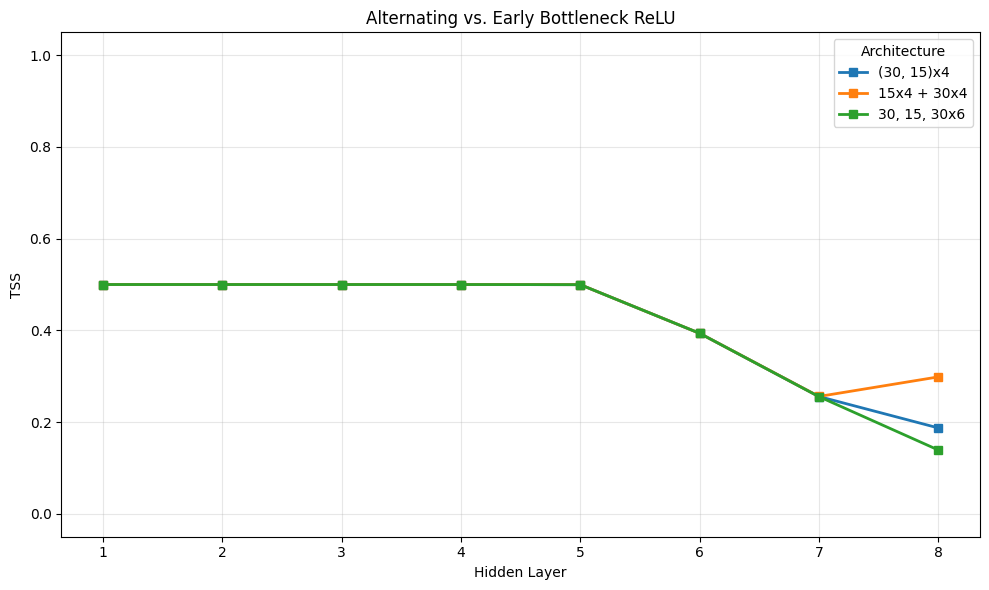

{'(30_15)x4_relu': array([0.5       , 0.5       , 0.5       , 0.5       , 0.49968182,
        0.39362727, 0.25575455, 0.18729091]),
 '15x4_30x4_relu': array([0.5       , 0.5       , 0.5       , 0.5       , 0.49968182,
        0.39362727, 0.25588182, 0.29852727]),
 '30_15_30x6_relu': array([0.5       , 0.5       , 0.5       , 0.5       , 0.49968182,
        0.39362727, 0.25552727, 0.13916364])}

In [78]:
Trainer.plot_tsc(
    data=data,
    to_calculate=[r'\(30_15\)', r'15x4_30x4', r'30_15_30x6'],
    mean=False,
    only_hidden=True,
    title='Alternating vs. Early Bottleneck ReLU',
    legend=['(30, 15)x4', '15x4 + 30x4', '30, 15, 30x6'],
    legend_title='Architecture',
    save=True,
    filename='alternating_vs_early_bottleneck_30_15_30x6_relu_vs_all_relu'
)